# Calculating recurrence scores in time series

In [2]:
using CABLAB
using ImageMagick #Necessary for inline Map plots
mydir="/Net/Groups/BGI/scratch/fgans/cubes"
#isdir(joinpath(mydir,"tmp")) && rm(joinpath(mydir,"tmp"),recursive=true)
DATdir(mydir)

"/Net/Groups/BGI/scratch/fgans/cubes"

We define the path to the datacube, choose some variables and read a geographical region into memory.

In [3]:
c             = Cube("/Net/Groups/BGI/scratch/DataCube/v1/brockmann-consult.de/datacube")
vars          = ["Emission","SoilMoisture","t2m"];
cdata         = getCubeData(c,latitude=(35,65), longitude=(-10,35),variable=vars);

Here starts the actual processing step. Note that each function call has the result of the previous call as its argument. The following processing steps are applied:

- gap Filling with the mean seasonal cycle
- calculating anomalies, i.e. subtract the mean seasonal cycle
- normalize the different variables to unit variance
- caculate recurrence scores to detect outliers

In [4]:
@time cube_filled     = map(gapFillMSC,cdata,46,max_cache=1e7);

 12.496275 seconds (10.04 M allocations: 691.549 MB, 1.60% gc time)


In [5]:
@time cube_anomalies  = map(removeMSC,cube_filled,46,max_cache=1e7);

  4.822955 seconds (4.95 M allocations: 192.574 MB, 1.04% gc time)


In [6]:
@time cube_normalized = map(normalize,cube_anomalies,max_cache=1e7);

  4.297647 seconds (2.80 M allocations: 148.347 MB, 3.66% gc time)


In [7]:
@time scores          = map(recurrences,cube_normalized,5.0,5,zeros(Float32,506,506),max_cache=1e7);

 51.243844 seconds (47.27 M allocations: 1.991 GB, 0.77% gc time)


Here follow some interactive time series plots of the different variables, anomalies, and the resulting scores. 3 Extreme events would be detected here. 

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"Emission",true)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"SoilMoisture",true)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"t2m",true)

Interact.Slider{Float64}(Signal{Float64}(12.25, nactions=0),"Longitude",12.25,-10.0:0.25:34.75,true)

Interact.Slider{Float64}(Signal{Float64}(50.0, nactions=0),"Latitude",50.0,35.25:0.25:65.0,true)

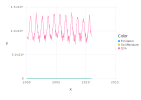

In [8]:
plotTS(cube_filled)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"Emission",true)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"SoilMoisture",true)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"t2m",true)

Interact.Slider{Float64}(Signal{Float64}(12.25, nactions=0),"Longitude",12.25,-10.0:0.25:34.75,true)

Interact.Slider{Float64}(Signal{Float64}(50.0, nactions=0),"Latitude",50.0,35.25:0.25:65.0,true)

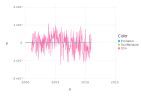

In [9]:
plotTS(cube_anomalies)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"Emission",true)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"SoilMoisture",true)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"t2m",true)

Interact.Slider{Float64}(Signal{Float64}(12.25, nactions=0),"Longitude",12.25,-10.0:0.25:34.75,true)

Interact.Slider{Float64}(Signal{Float64}(50.0, nactions=0),"Latitude",50.0,35.25:0.25:65.0,true)

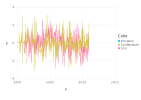

In [10]:
plotTS(cube_normalized)

Interact.Slider{Float64}(Signal{Float64}(12.25, nactions=0),"Longitude",12.25,-10.0:0.25:34.75,true)

Interact.Slider{Float64}(Signal{Float64}(50.0, nactions=0),"Latitude",50.0,35.25:0.25:65.0,true)

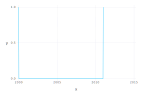

In [11]:
plotTS(scores)

Interact.Slider{Int64}(Signal{Int64}(253, nactions=0),"Time Step",253,1:506,true)

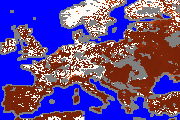

In [13]:
plotMAP(scores,dmin=400.f0,dmax=400.f0)

In [1]:
using Interact, Reactive
s=Interact.slider(1:10,label="Hallo")
x=map(i->5*i,signal(s))
display(s)
x

Interact.Slider{Int64}(Signal{Int64}(5, nactions=1),"Hallo",5,1:10,true)

25

In [55]:
methods(Interact.Slider)

3-element Array{Any,1}:
 call{T<:Number}(::Type{Interact.Slider{T<:Number}}, signal::Reactive.Signal{T<:Number}, label::AbstractString, value::T<:Number, range::Range{T<:Number}, continuous_update::Bool) at /Net/Groups/BGI/people/fgans/julia_alt_packages/v0.4/Interact/src/widgets.jl:15
 call{T}(::Type{T}, arg) at essentials.jl:56                                                                                                                                                                                                                          
 call{T}(::Type{T}, args...) at essentials.jl:57                                                                                                                                                                                                                      